In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create SQLite DB and connect
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [3]:
# Step 2: Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [4]:
# Step 3: Insert sample data
sample_data = [
    ('Product A', 10, 15.0),
    ('Product B', 5, 30.0),
    ('Product A', 3, 15.0),
    ('Product C', 8, 12.5),
    ('Product B', 2, 30.0),
    ('Product C', 5, 12.5)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

In [5]:
# Step 4: SQL query to summarize sales
query = '''
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
'''


In [6]:
# Step 5: Load result into pandas DataFrame
df = pd.read_sql_query(query, conn)
print("Sales Summary:")
print(df)


Sales Summary:
     product  total_quantity  total_revenue
0  Product A              13          195.0
1  Product B               7          210.0
2  Product C              13          162.5


<Figure size 800x500 with 0 Axes>

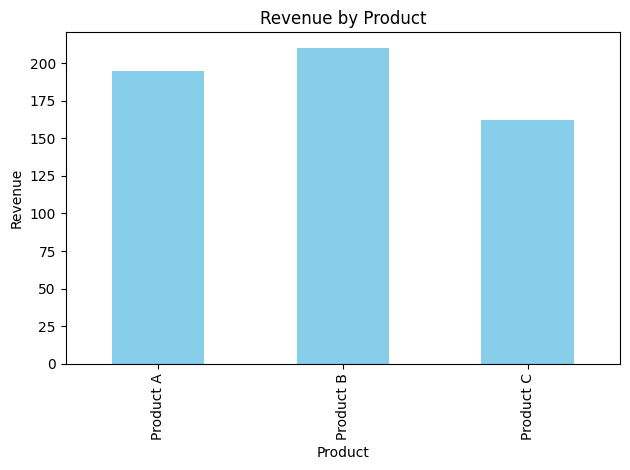

In [7]:
# Step 6: Plotting bar chart
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='total_revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('sales_chart.png')  # Optional: saves the chart as a PNG
plt.show()


In [8]:
# Step 7: Close the DB connection
conn.close()
